In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('btc_6h.csv')

In [3]:
df = df.set_index(pd.DatetimeIndex(df['datetime'].values))

In [4]:
df['ema_short'] = df['close'].ewm(span = 9, adjust = False).mean()
df['ema_long'] = df['close'].ewm(span = 21, adjust = False).mean()

In [5]:
df['bullish'] = 0.0
df['bullish'] = np.where(df['ema_short'] > df['ema_long'], 1, 0)

In [6]:
df['crossover'] = df['bullish'].diff()

Text(0.5, 1.0, 'EMA Chart')

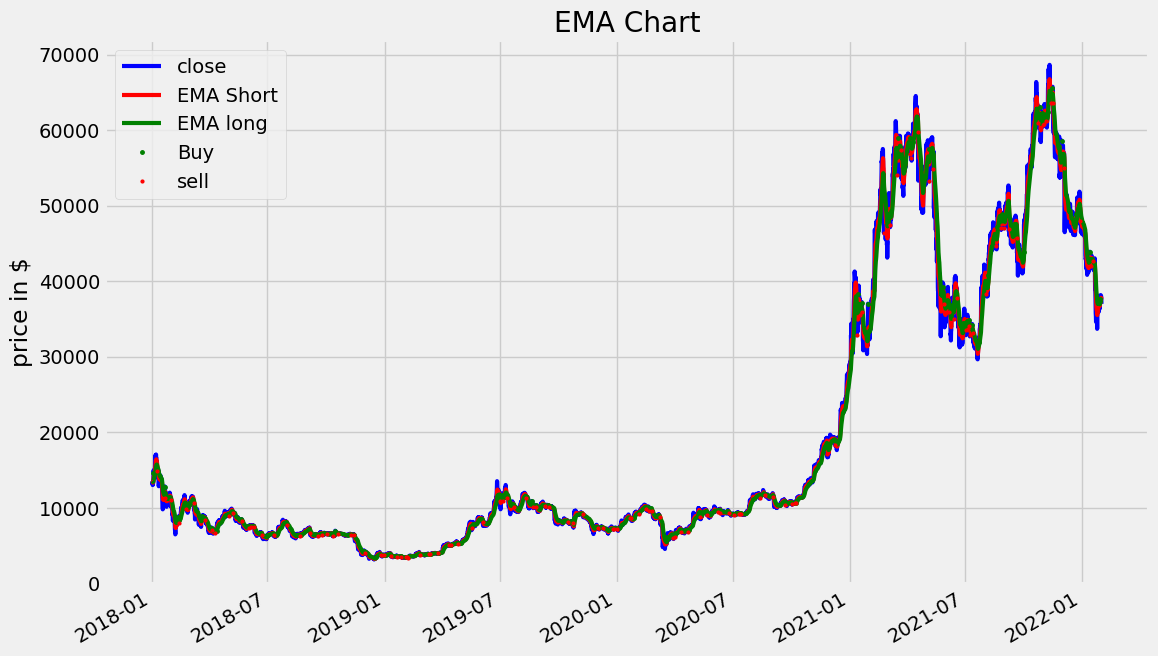

In [7]:
fig = plt.figure(figsize = (12,8))
axl = fig.add_subplot(111, ylabel = 'price in $')

df['close'].plot(ax = axl, color = 'b', lw =3.)
df['ema_short'].plot(ax = axl, color = 'r', lw =3.)
df['ema_long'].plot(ax = axl, color = 'g', lw =3.)

axl.plot(df.loc[df.crossover == 1].index,
         df.close[df.crossover == 1],
         '.', markersize = 5, color = 'g')

axl.plot(df.loc[df.crossover == -1].index,
         df.close[df.crossover == -1],
         '.', markersize = 4, color = 'r')

plt.legend(['close', 'EMA Short', 'EMA long', 'Buy', 'sell'])
plt.title('EMA Chart')
